In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import numpy as np
import plt_conf as conf
import ModuloPlotTrian as mpt
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset


In [3]:
conf.general()  # cargando configuración general

In [6]:
!ls

AngleAnnotation.py                 Plots
Creacion Triangulos Numericos.nb   PlotsTrg.ipynb
Data                               Triangles.pdf
Kotler Triangulos Analitico.nb     __pycache__
ModuloPlotTrian.py                 plt_conf.py
Notebook Graficar Triangulos.ipynb text_curv.py


In [13]:
## Importacion de datos ##
#rute = "C:\\Users\\flavi\\Dropbox\\Flavio_Proyectos\\Cubic Gravity (No se ha abandonado... aun)\\Triangulos\\Data\\" 
rute = '/Users/armandoroqueestrada/Library/CloudStorage/Dropbox/Flavio_Proyectos/Cubic Gravity (No se ha abandonado... aun)/Triangulos/Data/'

Namesb4 = ["Angle_C1_PhiMin_b4.txt","Angle_C1_PhiMax_b4.txt","Angle_C3_Phi_b4.txt","Angle_C2_Phi_b4.txt","Kottler_R_C1_PhiMin_b4.txt","Kottler_R_C1_PhiMax_b4.txt","Kottler_R_C2_b4.txt",
     "Kottler_R_C3_b4.txt","ECG_R_C1_PhiMin_b4.txt","ECG_R_C1_PhiMax_b4.txt","ECG_R_C3_b4.txt","ECG_R_C2_b4.txt"]

datosb4 = {nombre: np.loadtxt(os.path.join(rute, nombre)) for nombre in Namesb4}

KottlerTriangle_b4 = [
    ('Kottler_R_C1_PhiMin_b4.txt', 'Angle_C1_PhiMin_b4.txt'),
    ('Kottler_R_C1_PhiMax_b4.txt', 'Angle_C1_PhiMax_b4.txt'),
    ('Kottler_R_C3_b4.txt', 'Angle_C3_Phi_b4.txt'),
    ('Kottler_R_C2_b4.txt', 'Angle_C2_Phi_b4.txt')]

ECGTriangle_b4=[
    ('ECG_R_C1_PhiMin_b4.txt', 'Angle_C1_PhiMin_b4.txt'),
    ('ECG_R_C1_PhiMax_b4.txt', 'Angle_C1_PhiMax_b4.txt'),
    ('ECG_R_C3_b4.txt', 'Angle_C3_Phi_b4.txt'),
    ('ECG_R_C2_b4.txt', 'Angle_C2_Phi_b4.txt')]

################ Data far the horizon ########################
Namesb15=["Angle_C1_PhiMin_b15.txt","Angle_C1_PhiMax_b15.txt","Angle_C3_Phi_b15.txt","Angle_C2_Phi_b15.txt","Kottler_R_C1_PhiMin_b15.txt","Kottler_R_C1_PhiMax_b15.txt","Kottler_R_C2_b15.txt",
     "Kottler_R_C3_b15.txt","ECG_R_C1_PhiMin_b15.txt","ECG_R_C1_PhiMax_b15.txt","ECG_R_C3_b15.txt","ECG_R_C2_b15.txt"]
datosb15 = {nombre: np.loadtxt(os.path.join(rute, nombre)) for nombre in Namesb15}

KottlerTriangle_b15=[
    ('Kottler_R_C1_PhiMin_b15.txt', 'Angle_C1_PhiMin_b15.txt'),
    ('Kottler_R_C1_PhiMax_b15.txt', 'Angle_C1_PhiMax_b15.txt'),
    ('Kottler_R_C3_b15.txt', 'Angle_C3_Phi_b15.txt'),
    ('Kottler_R_C2_b15.txt', 'Angle_C2_Phi_b15.txt')]

ECGTriangle_b15=[
    ('ECG_R_C1_PhiMin_b15.txt', 'Angle_C1_PhiMin_b15.txt'),
    ('ECG_R_C1_PhiMax_b15.txt', 'Angle_C1_PhiMax_b15.txt'),
    ('ECG_R_C3_b15.txt', 'Angle_C3_Phi_b15.txt'),
    ('ECG_R_C2_b15.txt', 'Angle_C2_Phi_b15.txt')]



/var/folders/mf/vfyq6zyn4l35gfd2kgq4k2q00000gn/T/ipykernel_94488/2870172159.py:4: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(22.5, 7.5))
/var/folders/mf/vfyq6zyn4l35gfd2kgq4k2q00000gn/T/ipykernel_94488/2870172159.py:83: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  ax_inset = fig.add_axes([left, bottom, width, height])


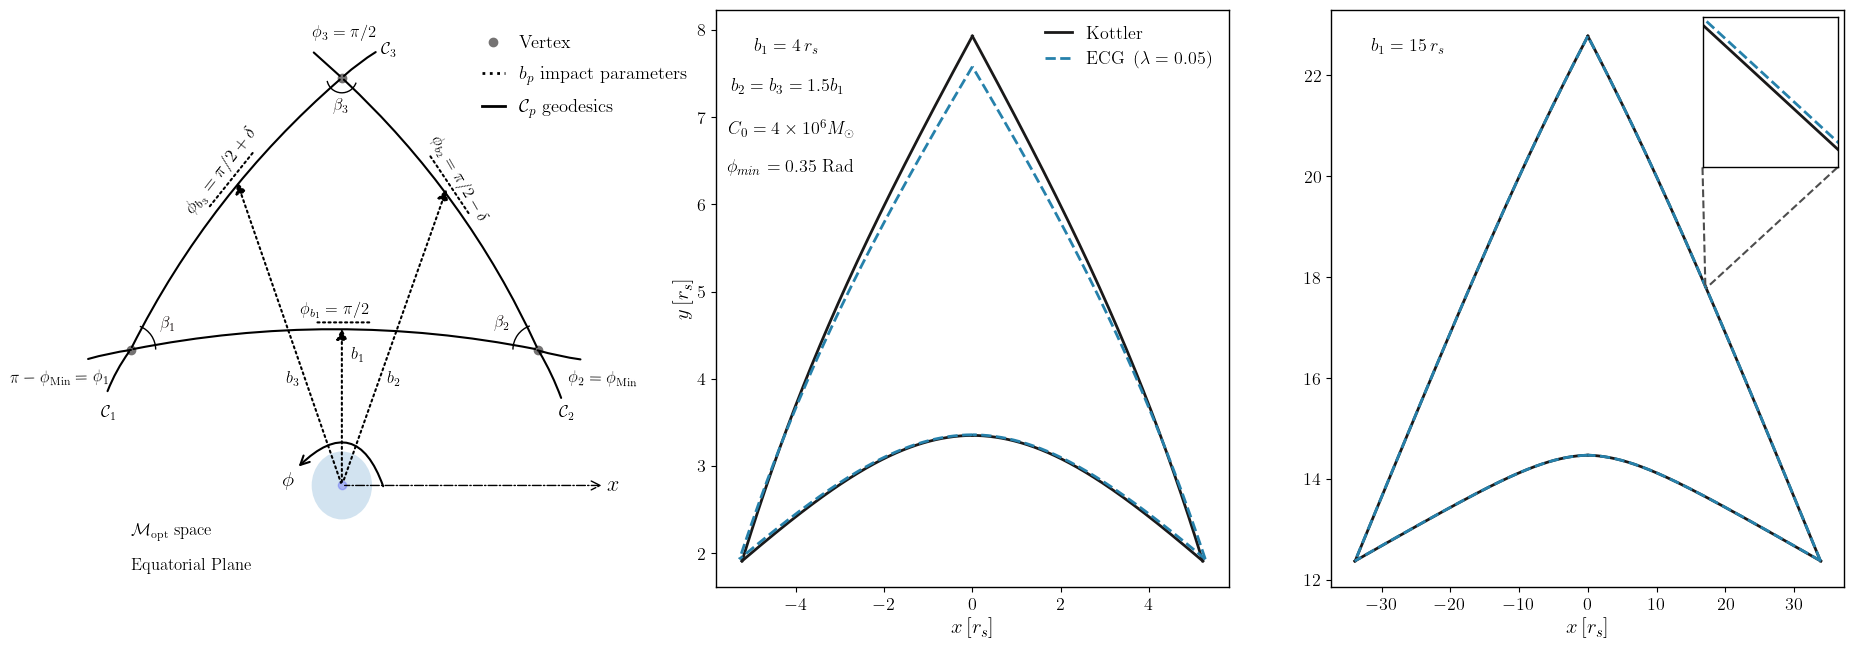

In [99]:
### Ploting ###
col = ['#1a1919', '#f0784d', '#2681ab', '#ab262f', '#bc92e0', '#486318', '#ed5b0c', 
      '#f0a092', '#484f07', '#694d0c']
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(22.5, 7.5))
mpt.crear_imagen(ax[0])

def parametric_coord(radius, angle):
    radius = np.array(radius)
    angle = np.array(angle)
    return radius * np.cos(angle), radius * np.sin(angle)

###################### Triangle near horizon ######################
#Kot Trianngle
for idx, (r_file, phi_file) in enumerate(KottlerTriangle_b4):
    ax[1].plot(
        *parametric_coord(datosb4[r_file], datosb4[phi_file]), 
        color=col[0], 
        label="Kottler" if idx == 0 else ""
    )

#ECG Triangle
for idx, (r_file, phi_file) in enumerate(ECGTriangle_b4):
    ax[1].plot(
        *parametric_coord(datosb4[r_file], datosb4[phi_file]), 
        color=col[2], 
        ls='--', 
        label=r'ECG $\, (\lambda =0.05) $' if idx == 0 else ""
    )

ax[1].legend(frameon=False, loc = 'upper right',fontsize=13)
ax[1].text(0.2, 0.95, r'$b_1 = 4 \, r_s$', 
        fontsize=13, ha='right', va='top', transform=ax[1].transAxes,
        bbox=dict(facecolor='none', edgecolor='none'))  

ax[1].text(0.25, 0.88, r'$b_2 = b_3 = 1.5 b_1$', 
        fontsize=13, ha='right', va='top', transform=ax[1].transAxes,
        bbox=dict(facecolor='none', edgecolor='none'))


ax[1].text(0.27, 0.81,r'$C_0=4 \times 10^6 M_{\odot}$', 
         fontsize=13, ha='right', va='top', transform=ax[1].transAxes,
         bbox=dict(facecolor='none', edgecolor='none'))


ax[1].text(0.27, 0.74,r'$\phi_{min}=0.35$ Rad', 
         fontsize=13, ha='right', va='top', transform=ax[1].transAxes,
         bbox=dict(facecolor='none', edgecolor='none'))



    

ax[1].set_xlabel(r"$x\, [r_s]$")
ax[1].set_ylabel(r'$y\,[r_s]$')    

################### Triangle Far Horizon #############################
 #Kot Trianngle
for idx, (r_file, phi_file) in enumerate(KottlerTriangle_b15):
     ax[2].plot(
         *parametric_coord(datosb15[r_file], datosb15[phi_file]), 
         color=col[0], 
         label="Kottler" if idx == 0 else ""
     )

#ECG Triangle
for idx, (r_file, phi_file) in enumerate(ECGTriangle_b15):
     ax[2].plot(
         *parametric_coord(datosb15[r_file], datosb15[phi_file]), 
         color=col[2], 
         ls='--', 
         label=r'$ECG \, (\lambda =0.05) $' if idx == 0 else ""
     )

#ax[2].legend(frameon=False, loc = 'upper left',fontsize=13)
ax[2].text(1.42, 0.95, r'$b_1 = 15 \, r_s$', 
         fontsize=13, ha='right', va='top', transform=ax[1].transAxes,
         bbox=dict(facecolor='none', edgecolor='none'))  

ax[2].set_xlabel(r"$x\, [r_s]$")

####### Inset 3rd Imagen ############################
left, bottom, width, height = [0.837, 0.67, 0.06, 0.2]  # posición y dimensiones del insert
ax_inset = fig.add_axes([left, bottom, width, height])

xZomK, yZomK = parametric_coord(datosb15['Kottler_R_C2_b15.txt'], datosb15['Angle_C2_Phi_b15.txt'])
xZomECG, yZomECG = parametric_coord(datosb15['ECG_R_C2_b15.txt'], datosb15['Angle_C2_Phi_b15.txt'])
ax_inset.plot(xZomK, yZomK, label="Kottler", color=col[0])
ax_inset.plot(xZomECG,yZomECG,label='ECG',color=col[2],ls="--")
ax_inset.set_xlim(17.1, 17.2)  
ax_inset.set_ylim(17.78199, 17.82)
ax_inset.set_xticks([])
ax_inset.set_yticks([])
mark_inset(ax[2], ax_inset, loc1=3, loc2=4, ec="0.3", lw=1.5, ls='--')


plt.savefig('Triangles.pdf', format='pdf', bbox_inches='tight')

/var/folders/mf/vfyq6zyn4l35gfd2kgq4k2q00000gn/T/ipykernel_94488/4231938320.py:10: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(22.5, 6.), gridspec_kw=dict(hspace=0.0, wspace=.28))
/var/folders/mf/vfyq6zyn4l35gfd2kgq4k2q00000gn/T/ipykernel_94488/4231938320.py:59: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  ax_inset = fig.add_axes([left, bottom, width, height])


Text(1.52, 0.95, '$b_1 = 15 \\, r_s$')

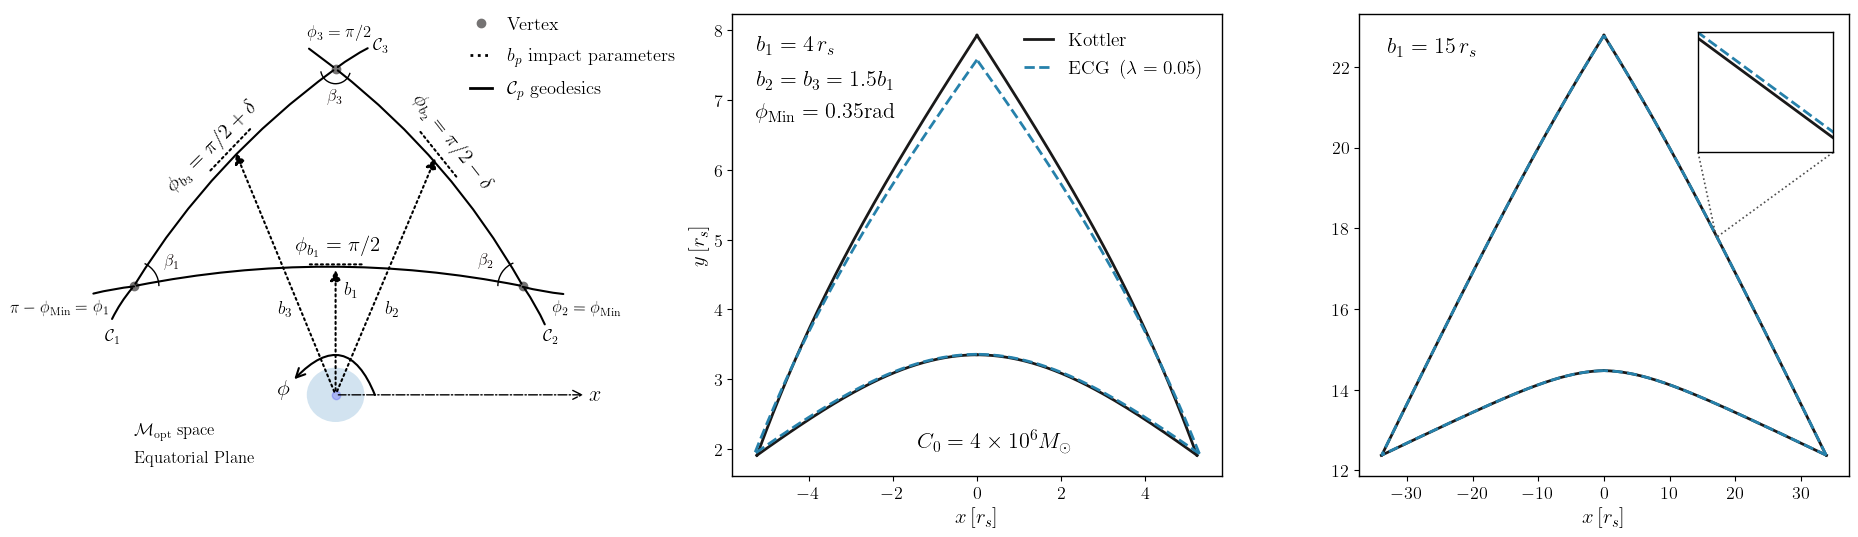

In [137]:
### Ploting ###
def parametric_coord(radius, angle):
    radius = np.array(radius)
    angle = np.array(angle)
    return radius * np.cos(angle), radius * np.sin(angle)

col = ['#1a1919', '#f0784d', '#2681ab', '#ab262f', '#bc92e0', '#486318', '#ed5b0c', 
      '#f0a092', '#484f07', '#694d0c']

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(22.5, 6.), gridspec_kw=dict(hspace=0.0, wspace=.28))
mpt.crear_imagen2(ax[0])

###################### Triangle near horizon ######################
#Kot Trianngle
for idx, (r_file, phi_file) in enumerate(KottlerTriangle_b4):
    ax[1].plot(
        *parametric_coord(datosb4[r_file], datosb4[phi_file]), 
        color=col[0], 
        label="Kottler" if idx == 0 else ""
    )

#ECG Triangle
for idx, (r_file, phi_file) in enumerate(ECGTriangle_b4):
    ax[1].plot(
        *parametric_coord(datosb4[r_file], datosb4[phi_file]), 
        color=col[2], 
        ls='--', 
        label=r'ECG $\, (\lambda =0.05) $' if idx == 0 else ""
    )

ax[1].legend(frameon=False, loc = 'upper right', fontsize=14)

ax[1].set_xlabel(r"$x\, [r_s]$")
ax[1].set_ylabel(r'$y\,[r_s]$')    

################### Triangle Far Horizon #############################
 #Kot Trianngle
for idx, (r_file, phi_file) in enumerate(KottlerTriangle_b15):
     ax[2].plot(
         *parametric_coord(datosb15[r_file], datosb15[phi_file]), 
         color=col[0], 
         label="Kottler" if idx == 0 else ""
     )

#ECG Triangle
for idx, (r_file, phi_file) in enumerate(ECGTriangle_b15):
     ax[2].plot(
         *parametric_coord(datosb15[r_file], datosb15[phi_file]), 
         color=col[2], 
         ls='--', 
         label=r'$ECG \, (\lambda =0.05) $' if idx == 0 else ""
     )

#ax[2].legend(frameon=False, loc = 'upper left',fontsize=13)
ax[2].set_xlabel(r"$x\, [r_s]$")

####### Inset 3rd Imagen ############################
left, bottom, width, height = [0.833, 0.65, 0.06, 0.2]  # posición y dimensiones del insert
ax_inset = fig.add_axes([left, bottom, width, height])

xZomK, yZomK = parametric_coord(datosb15['Kottler_R_C2_b15.txt'], datosb15['Angle_C2_Phi_b15.txt'])
xZomECG, yZomECG = parametric_coord(datosb15['ECG_R_C2_b15.txt'], datosb15['Angle_C2_Phi_b15.txt'])

ax_inset.plot(xZomK, yZomK, label="Kottler", color=col[0])
ax_inset.plot(xZomECG,yZomECG,label='ECG',color=col[2],ls="--")

ax_inset.set_xlim(17.1, 17.2)  
ax_inset.set_ylim(17.78199, 17.82)
ax_inset.set_xticks([])
ax_inset.set_yticks([])

mark_inset(ax[2], ax_inset, loc1=3, loc2=4, ec="0.3", lw=1.2, ls=':')

ax[1].text(-5.25, 7.7, r'$b_1 = 4 \, r_s$') #, fontsize=13,
        #ha='right', va='top', transform=ax[1].transAxes,
        #bbox=dict(facecolor='none', edgecolor='none'))  

ax[1].text(-5.25, 7.2, r'$b_2 = b_3 = 1.5 b_1$') #,fontsize=13, 
        # ha='right', va='top', transform=ax[1].transAxes,
        #bbox=dict(facecolor='none', edgecolor='none'))


ax[1].text(-1.4, 2,r'$C_0=4 \times 10^6 M_{\odot}$') #, fontsize=13, 
          # ha='right', va='top', transform=ax[1].transAxes,
         #bbox=dict(facecolor='none', edgecolor='none'))


ax[1].text(-5.25, 6.75,r'$\phi_{\mathrm{Min}}=0.35$rad') 
         #fontsize=13, ha='right', va='top', transform=ax[1].transAxes,
         #bbox=dict(facecolor='none', edgecolor='none'))
         
ax[2].text(1.52, 0.95, r'$b_1 = 15 \, r_s$', ha='right', va='top', transform=ax[1].transAxes)
         #fontsize=13, ha='right', va='top', transform=ax[1].transAxes,
         #bbox=dict(facecolor='none', edgecolor='none'))  

In [138]:
fig.savefig("Triangles2.pdf", format='pdf', metadata=None,
            facecolor='auto', edgecolor='auto',
            backend=None, dpi=1000, 
            bbox_inches='tight')